# What is Mixed Data ???

The data that contains both numreric and categorical data.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import Binarizer         # to use Binarization
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')   

In [13]:
df = pd.read_csv('train.csv')[['Cabin', 'Ticket', 'SibSp', 'Parch', 'Survived']]
df['Passengers'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp', 'Parch'], inplace=True)
df.head(3)

,Cabin,Ticket,Survived,Passengers
0,NaN,A/5 21171,0,1
1,C85,PC 17599,1,1
2,NaN,STON/O2. 3101282,1,0


In [14]:
print(df.isna().sum())
df.dropna(inplace=True)
df.isna().sum()

Cabin         687
Ticket          0
Survived        0
Passengers      0
dtype: int64


Cabin         0
Ticket        0
Survived      0
Passengers    0
dtype: int64

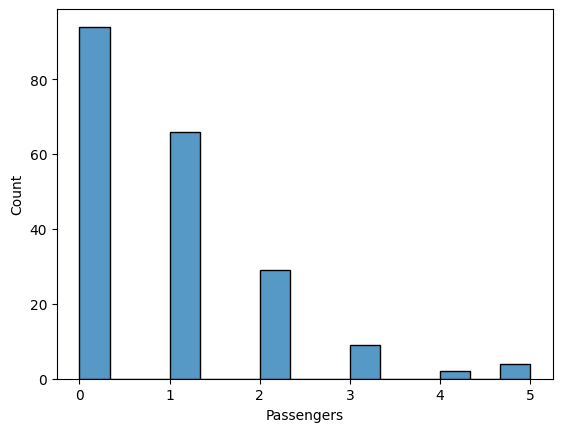

In [15]:
sns.histplot(df, x='Passengers')        # this shows the number of passengers travelling in titanic
plt.show()


In [16]:
df

,Cabin,Ticket,Survived,Passengers
1,C85,PC 17599,1,1
3,C123,113803,1,1
6,E46,17463,0,0
10,G6,PP 9549,1,2
11,C103,113783,1,0
...,...,...,...,...
871,D35,11751,1,2
872,B51 B53 B55,695,0,0
879,C50,11767,1,1
887,B42,112053,1,0


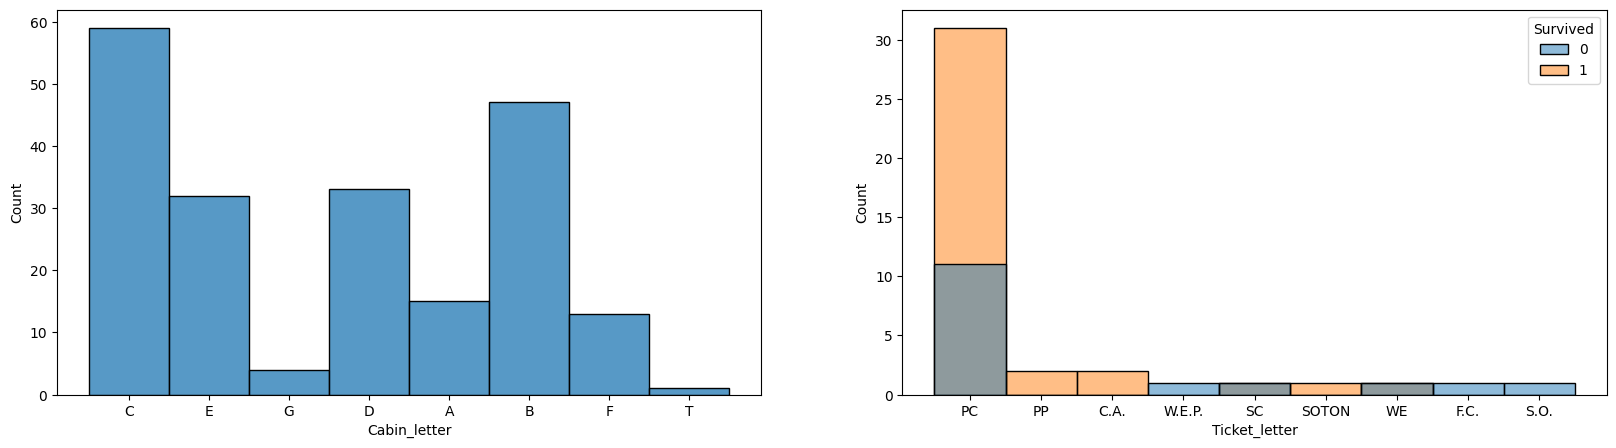

In [21]:
# Extract number part from Cabin
df['Cabin_number'] = df['Cabin'].str.extract('(\d+)').astype('float')
# Extract letter part from Cabin
df['Cabin_letter'] = df['Cabin'].str.extract('([A-Za-z])')


"""
str.extract('(\d+)'):
    - \d  : matches any digit (0-9)
    - +   : one or more digits
    - ()  : capture group; the extracted part

Examples:
    'C123' → '123'
    'B45'  → '45'
    'E8'   → '8'
    'A'    → NaN (no digits found)

astype('float'):
    - converts the extracted string digits into numeric dtype
    - if you dont write this the numbers will be stored as strings


_______________________________________________________________________________________    

str.extract('([A-Za-z])'):
    - [A-Za-z] : matches any alphabet character (A-Z or a-z)
    - ()       : capture group; the extracted part

Examples:
    'C123' → 'C'
    'B45'  → 'B'
    'F2'   → 'F'
    '123'  → NaN (no letters found)

This is typically used to infer the passenger deck.

"""


# Extract number part from Ticket
df['Ticket_number'] = df['Ticket'].str.extract(r'(\d+)').astype('float')
# Extract letter part from Ticket
df['Ticket_letter'] = df['Ticket'].str.extract(r'([A-Za-z.]+)')        # since Ticket contains values like this W.E.P. 5734, we have to modify the code a little bit
# Raw string. Tells Python not to treat backslashes as special escape characters.
# . (will take every symbols that are used like @ and # if used)
    # if you want only any specific symbol to take then you can write it like '/@ or /#' 
# + - Quantifier meaning “one or more”.




plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='Cabin_letter')       

plt.subplot(1,2,2)
sns.histplot(data=df, x='Ticket_letter', hue='Survived')

plt.show()




In [23]:
df = df.drop(columns=['Cabin', 'Ticket'])
df

,Survived,Passengers,Cabin_number,Cabin_letter,Ticket_number,Ticket_letter
1,1,1,85.0,C,17599.0,PC
3,1,1,123.0,C,113803.0,NaN
6,0,0,46.0,E,17463.0,NaN
10,1,2,6.0,G,9549.0,PP
11,1,0,103.0,C,113783.0,NaN
...,...,...,...,...,...,...
871,1,2,35.0,D,11751.0,NaN
872,0,0,51.0,B,695.0,NaN
879,1,1,50.0,C,11767.0,NaN
887,1,0,42.0,B,112053.0,NaN
